In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.datasets import make_blobs

# softmax

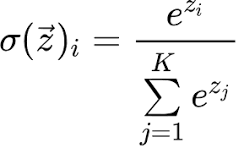

In [ ]:
# def softmax(z):
#   ez = np.exp(z)
#   sm_z = ez / np.sum(ez)
#   return sm_z

# dataset

In [46]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=38)

In [47]:
display(x_train)
display(y_train)

array([[ 4.03064741, -1.52993271],
       [ 6.52960132, -0.69722181],
       [ 3.73222469, -2.71795003],
       ...,
       [ 3.9392148 , -0.19859683],
       [-0.02104332,  1.73071816],
       [ 5.57554604,  0.01553397]])

array([3, 3, 3, ..., 3, 2, 3])

# model

In [48]:
model = Sequential([
    Dense(units = 25, activation='relu', name='layer_1'),
    Dense(units = 15, activation='relu', name='layer_2'),
    Dense(units = 4, activation='softmax', name='layer_3')
])

In [49]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.01))
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4599
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0231
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0209
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218
Epoch 16/100
63/

# prediction

In [50]:
prediction = model.predict(x_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [51]:
display(prediction[:5]) # first 5 predictions

array([[5.6048250e-17, 3.7152602e-18, 6.6760642e-12, 9.9999994e-01],
       [3.0102119e-34, 1.0609075e-36, 2.5053960e-20, 9.9999994e-01],
       [1.3722359e-13, 1.3012876e-13, 2.4649456e-12, 9.9999994e-01],
       [3.2849758e-07, 2.2525671e-03, 9.9772447e-01, 2.2610879e-05],
       [7.1887594e-23, 1.0137365e-19, 9.9999994e-01, 5.1323342e-12]],
      dtype=float32)

In [52]:
display(np.argmax(prediction[:5], axis=1)) # first 5 predictions

array([3, 3, 3, 2, 2])

In [53]:
predicted_classes = np.argmax(prediction, axis=1) #  predictions

In [54]:
pred_count = np.bincount(predicted_classes)

In [55]:
for i, count in enumerate(pred_count):
  print(f'class: {i}\tpredicted class count: {count}')

class: 0	predicted class count: 503
class: 1	predicted class count: 494
class: 2	predicted class count: 503
class: 3	predicted class count: 500
